In [16]:
from keras.datasets import mnist
from tensorflow.python.keras.utils import np_utils
import numpy as np
np.random.seed(10)

In [17]:
(x_Train, y_Train), (x_Test, y_Test) = mnist.load_data()

In [18]:
x_Train4D = x_Train.reshape(x_Train.shape[0],28,28,1).astype('float32')
x_Test4D = x_Test.reshape(x_Test.shape[0],28,28,1).astype('float32')

In [19]:
x_Train4D_normalize = x_Train4D / 255
x_Test4D_normalize = x_Test4D / 255

In [20]:
y_TrainOneHot = np_utils.to_categorical(y_Train)
y_TestOneHot = np_utils.to_categorical(y_Test)

In [21]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [22]:
model = Sequential()

model.add(Conv2D(
    filters=16,
    kernel_size=(5,5),
    padding='same',
    input_shape=(28,28,1),
    activation='relu'

))

In [23]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [24]:
model.add(Conv2D(
    filters=36,
    kernel_size=(5,5),
    padding='same',
    activation='relu'

))

In [25]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [26]:
model.add(Dropout(0.25))

In [27]:
model.add(Flatten())

In [28]:
model.add(Dense(128, activation='relu'))

In [29]:
model.add(Dropout(0.5))

In [30]:
model.add(Dense(10, activation='softmax'))

In [31]:
print(model.summary())

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 16)     │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 36)     │        14,436 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 36)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 36)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1764)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       225,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 242,062 (945.55 KB)

 Trainable params: 242,062 (945.55 KB)

 Non-trainable params: 0 (0.00 B)

None


In [32]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [33]:
train_history = model.fit(
    x = x_Train4D_normalize,
    y = y_TrainOneHot,
    validation_split=0.2,
    epochs=10,
    batch_size=300,
    verbose=2
    )

Epoch 1/10


160/160 - 7s - 47ms/step - accuracy: 0.8504 - loss: 0.4835 - val_accuracy: 0.9723 - val_loss: 0.0967
Epoch 2/10
160/160 - 5s - 32ms/step - accuracy: 0.9589 - loss: 0.1357 - val_accuracy: 0.9790 - val_loss: 0.0678
Epoch 3/10
160/160 - 5s - 31ms/step - accuracy: 0.9711 - loss: 0.0965 - val_accuracy: 0.9837 - val_loss: 0.0523
Epoch 4/10
160/160 - 6s - 35ms/step - accuracy: 0.9763 - loss: 0.0788 - val_accuracy: 0.9869 - val_loss: 0.0440
Epoch 5/10
160/160 - 6s - 35ms/step - accuracy: 0.9805 - loss: 0.0678 - val_accuracy: 0.9876 - val_loss: 0.0416
Epoch 6/10
160/160 - 6s - 35ms/step - accuracy: 0.9826 - loss: 0.0582 - val_accuracy: 0.9897 - val_loss: 0.0389
Epoch 7/10
160/160 - 5s - 34ms/step - accuracy: 0.9845 - loss: 0.0517 - val_accuracy: 0.9893 - val_loss: 0.0377
Epoch 8/10
160/160 - 6s - 34ms/step - accuracy: 0.9862 - loss: 0.0464 - val_accuracy: 0.9901 - val_loss: 0.0347
Epoch 9/10


KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

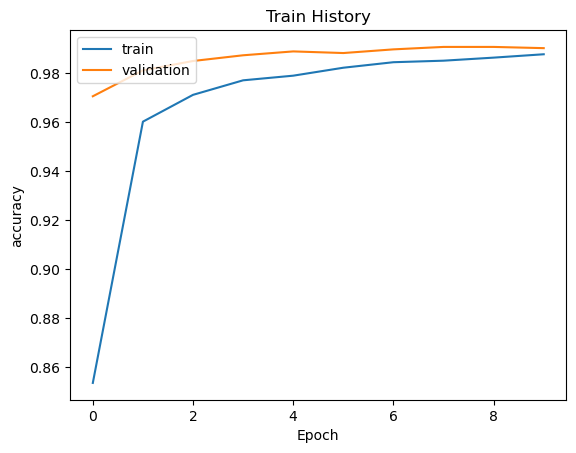

In [ ]:
show_train_history(train_history, 'accuracy', 'val_accuracy')

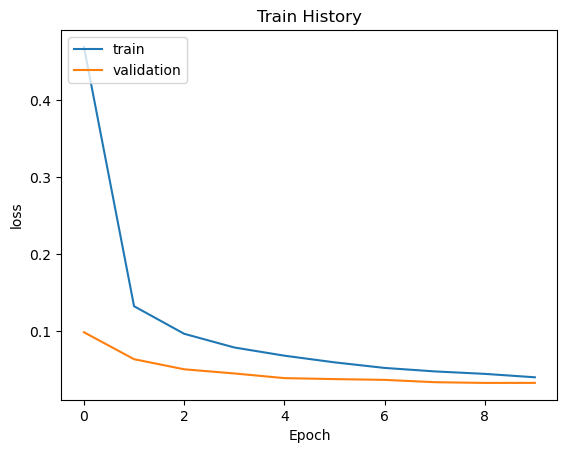

In [ ]:
show_train_history(train_history, 'loss', 'val_loss')

In [ ]:
scores = model.evaluate(x_Test4D_normalize, y_TestOneHot)
scores[1]

313/313 [==============================] - 1s 2ms/step - loss: 0.0230 - accuracy: 0.9923


0.9922999739646912

In [34]:
prediction = model.predict(x_Train4D_normalize)
prediction[:10]

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


array([[4.51931115e-09, 2.61517016e-07, 7.16008088e-08, 1.68851629e-01,
        1.05779685e-09, 8.31117690e-01, 1.98919299e-08, 6.43715623e-07,
        4.00476438e-06, 2.56636449e-05],
       [9.99999404e-01, 3.77485554e-09, 2.74612944e-07, 1.38324885e-09,
        2.22120863e-11, 1.08458131e-10, 2.69891757e-07, 7.73195813e-11,
        3.75424278e-08, 1.69092740e-08],
       [1.09639864e-09, 5.72210138e-06, 8.02196851e-08, 3.91056210e-09,
        9.99981046e-01, 5.34347411e-09, 6.31524966e-09, 2.92161599e-06,
        1.41757127e-07, 1.00772158e-05],
       [2.31642101e-08, 9.99998569e-01, 6.71037128e-08, 1.80047678e-11,
        5.57537021e-07, 6.33287311e-10, 5.65151872e-08, 2.65847717e-07,
        5.12122199e-07, 1.33008871e-09],
       [8.41263201e-08, 1.01979616e-07, 1.17584314e-07, 1.35745563e-06,
        2.15556240e-04, 1.85599802e-07, 8.66767283e-11, 1.87888618e-05,
        3.90366622e-04, 9.99373376e-01],
       [1.06978373e-08, 3.79872711e-09, 9.99999523e-01, 5.63200402e-08,
   

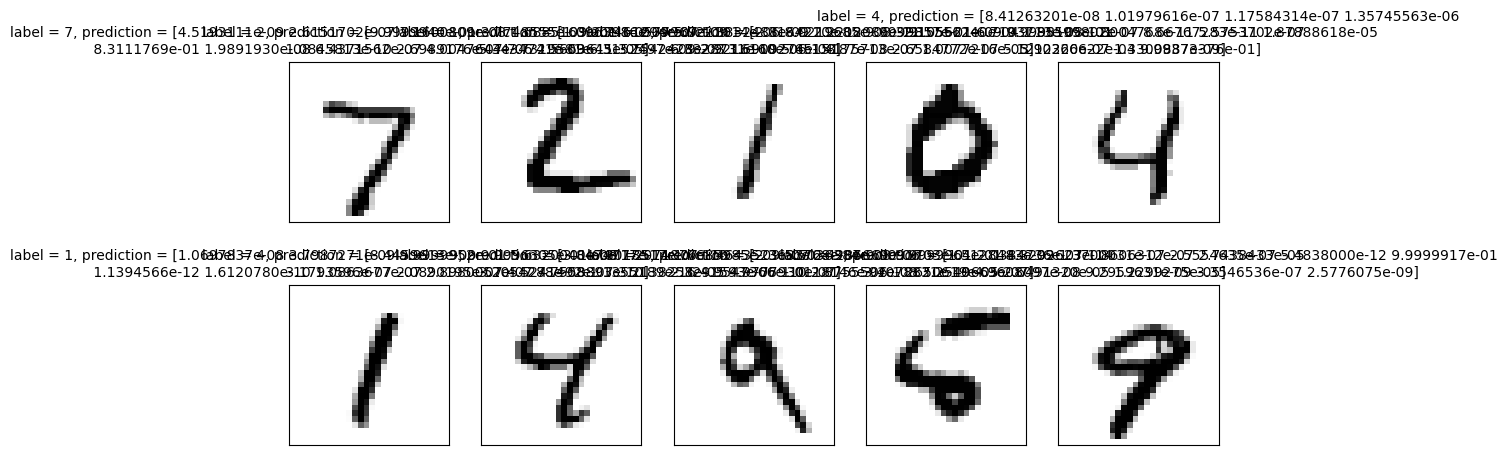

In [35]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images, labels, prediction, idx, num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)

    if num>25: num = 25
    for i in range(0, num):
        ax = plt.subplot(5, 5, i+1)
        ax.imshow(images[idx], cmap = 'binary')
        title = "label = " + str(labels[idx])
        if len(prediction)>0:
            title += ", prediction = " + str(prediction[idx])
        ax.set_title(title, fontsize = 10)
        ax.set_xticks([]); ax.set_yticks([])
        idx += 1
    plt.show()

plot_images_labels_prediction(x_Test, y_Test, prediction, idx = 0)

In [36]:
import pandas as pd
pd.crosstab(y_Test, prediction, rownames=['label'], colnames=['predict'])

ValueError: operands could not be broadcast together with shapes (1,10000) (60000,10) 